results.txt contains 6 dataset


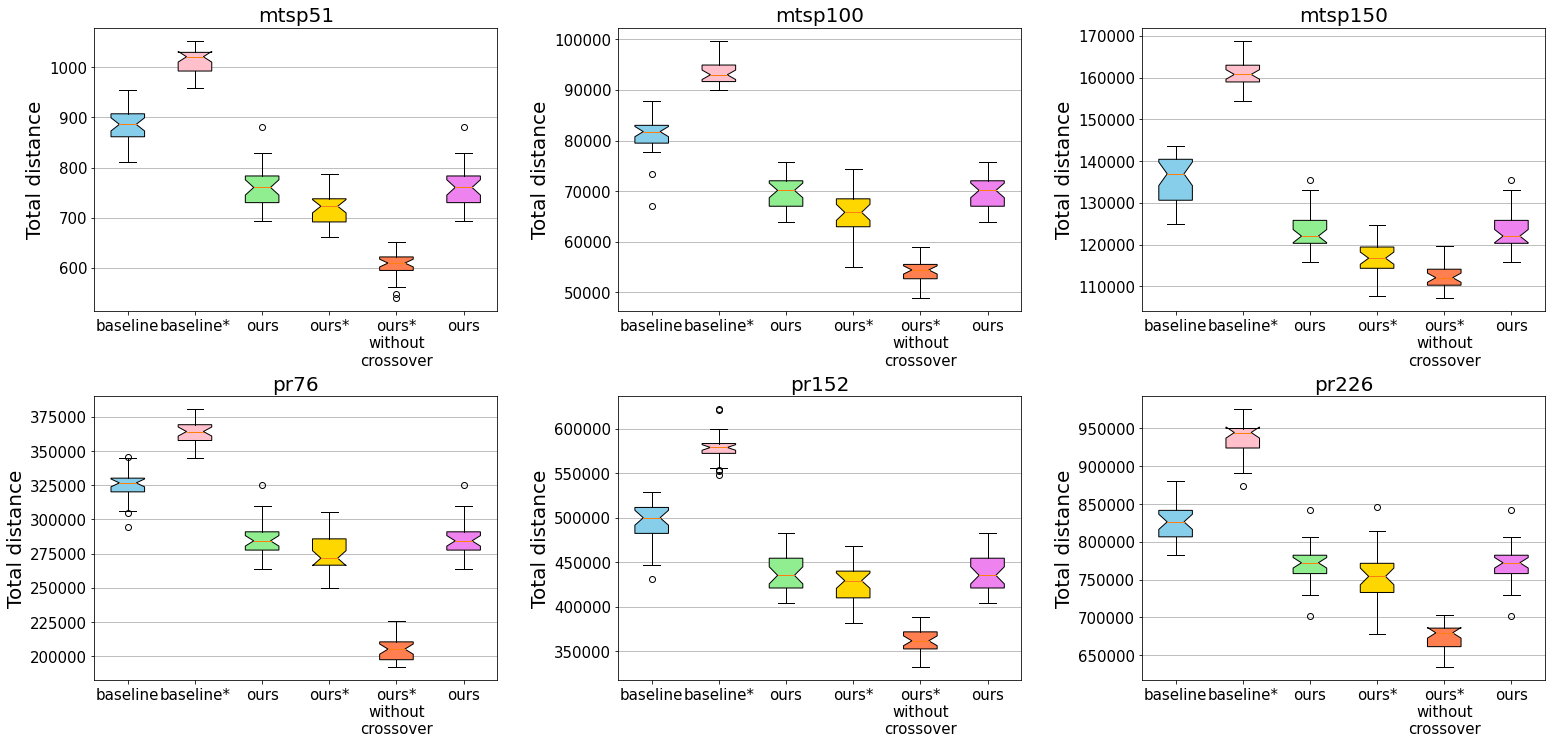

In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

results_filepath = 'results.txt'
results = pd.read_csv(results_filepath, header=None)


data = {}

for i in results.index:
    row = results.loc[i]
    instance = row[0]
    algorithm_name = row[1]
    data_type = row[2]

    if not instance in data:
        data[instance] = {}
    if not algorithm_name in data[instance]:
        data[instance][algorithm_name] = {} 
    data[instance][algorithm_name][data_type] = row[3:].to_numpy().tolist()

fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(26, 12))
plt.subplots_adjust(wspace=0.3, hspace=0.3)  # adjust the interval of subplots

print(f"{results_filepath} contains {len(data.keys())} dataset")

# instance to plot
instances = ['mtsp51', 'mtsp100', 'mtsp150', 'pr76', 'pr152', 'pr226']

# the algorithms you want to plot
algorithms = ['baseline','baseline*','ours','ours*','ours_nocrossover','ours']
labels =  ['baseline','baseline*','ours','ours*','ours*\nwithout\ncrossover','ours']
colors = ['skyblue', 'pink','lightgreen', 'gold', 'coral','violet']

plot_type = 'distance' # distance, count or time


for i in range(len(instances)):
    x = i // 3
    y = i % 3
    boxplot_data = [data[instances[i]][name][plot_type] for name in algorithms ]

    bplot = ax[x][y].boxplot(boxplot_data,
                         vert=True,  # vertical box alignment
                         notch=True,  # notch shape
                         patch_artist=True,  # fill with color
                         labels=labels)  # will be used to label x-ticks
    ax[x][y].set_ylabel('Total distance', fontsize=20)
    ax[x][y].tick_params(axis='y', which='major', labelsize=15)
    ax[x][y].tick_params(axis='x', which='major', labelsize=15)
    ax[x][y].set_title(instances[i], fontsize=20)
    ax[x][y].yaxis.grid(True)

    for patch, color in zip(bplot['boxes'], colors):
        patch.set_facecolor(color)


plt.savefig('./Pictures/compare.jpg')
plt.show()

    


In [68]:
from scipy.stats import ranksums
for instance in instances:
    statistic,pvalue = ranksums(data[instance]['ours_nocrossover']['distance'],data[instance]['baseline']['distance'],'less' )
    print(f"ours < baseline on {instance}: {pvalue}")

ours < baseline on mtsp51: 1.5099296795810785e-11
ours < baseline on mtsp100: 1.5099296795810785e-11
ours < baseline on mtsp150: 1.5099296795810785e-11
ours < baseline on pr76: 1.5099296795810785e-11
ours < baseline on pr152: 1.5099296795810785e-11
ours < baseline on pr226: 1.5099296795810785e-11
